### This project is all about visualizing different forces
    1. Unbalance Force
    2. Oscillating Force
    3. Centrifugal Force
    4. Tangential Force

Enter Unbalance Magnitude in kg.m: 1e-3
Enter Unbalance Orientation in degree: 30
Enter Rotational Speed in rpm: 4800


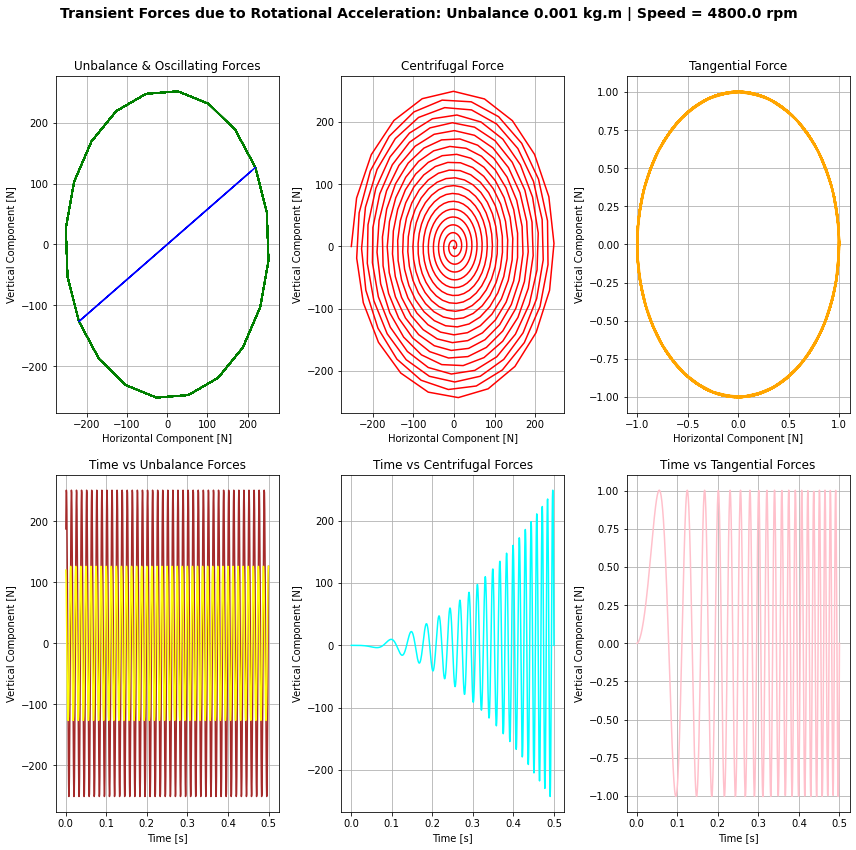

In [55]:
# 1 Rotating force due to unbalance
import math
import matplotlib.pyplot as plt

ub = float(input("Enter Unbalance Magnitude in kg.m: "))
ph = float(input("Enter Unbalance Orientation in degree: "))
rpm = float(input("Enter Rotational Speed in rpm: "))

t = 0.5
npts = int(rpm/60*20*t)
delt = t/npts
omg = 2*math.pi*rpm/60
ph = ph*math.pi/180

#### Array for Time ####

time_t = []

for i in range(1,npts+1,1):
    time_t.append(t/npts*i)

#### Rotating Unbalance Force Computation ####

Fub_H = []
Fub_V = []

for i in range(1,npts+1,1):
    Fub_H.append(ub*omg**2*(math.cos(i*omg*delt + ph)))
    Fub_V.append(ub*omg**2*(math.sin(i*omg*delt + ph)))

#### Osicllating Force Computation ####

Fo_H = []
Fo_V = []

for i in range(1,npts+1,1):
    Fo_H.append(ub*omg**2*(math.cos(i*omg*delt))*math.cos(ph))
    Fo_V.append(ub*omg**2*(math.cos(i*omg*delt))*math.sin(ph))

#### Centrifugal Force Computation ####

Fc_H = []
Fc_V = []

for i in range(1,npts+1,1):
    Fc_H.append(ub*((-(omg/t*i*delt)**2)*math.cos((omg/t)*(i*delt)**2/2)))
    Fc_V.append(ub*((-(omg/t*i*delt)**2)*math.sin((omg/t)*(i*delt)**2/2)))

#### Tangential Force Computation ####

Ft_H = []
Ft_V = []

for i in range(1,npts+1,1):
    Ft_H.append(ub*((omg/t)*math.cos((omg/t)*(i*delt)**2/2)))
    Ft_V.append(ub*((omg/t)*math.sin((omg/t)*(i*delt)**2/2)))

# Combined Load

Ftc_H = []
Ftc_V = []

for i in range(1,npts,1):
    Ftc_H.append(Ft_H[i]+Fc_H[i])
    Ftc_V.append(Ft_V[i]+Fc_V[i])

fig = plt.figure(figsize=(12,12)) # (Figzize = (6,12)) sets the image size to a square

plt.subplot(2,3,1)
plt.plot(Fub_H,Fub_V, color = 'green')
plt.plot(Fo_H,Fo_V, color = 'blue')
plt.title("Unbalance & Oscillating Forces")
plt.grid()
plt.xlabel("Horizontal Component [N]")
plt.ylabel("Vertical Component [N]")

plt.subplot(2,3,2)
plt.plot(Fc_H,Fc_V, color = 'red')
plt.title("Centrifugal Force")
plt.grid()
plt.xlabel("Horizontal Component [N]")
plt.ylabel("Vertical Component [N]")

plt.subplot(2,3,3)
plt.plot(Ft_H,Ft_V, color = 'orange')
plt.title("Tangential Force")
plt.grid()
plt.xlabel("Horizontal Component [N]")
plt.ylabel("Vertical Component [N]")

plt.subplot(2,3,4)
plt.plot(time_t,Fub_V, color = 'brown')
plt.plot(time_t,Fo_V, color = 'yellow')
plt.title("Time vs Unbalance Forces")
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Vertical Component [N]")

plt.subplot(2,3,5)
plt.plot(time_t,Fc_V, color = 'cyan')
plt.title("Time vs Centrifugal Forces")
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Vertical Component [N]")

plt.subplot(2,3,6)
plt.plot(time_t,Ft_V, color = 'pink')
plt.title("Time vs Tangential Forces")
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Vertical Component [N]")

fig.tight_layout(h_pad = 2)
fig.subplots_adjust(top=0.9)
fig.suptitle(f"Transient Forces due to Rotational Acceleration: Unbalance {ub} kg.m | Speed = {rpm} rpm", fontsize = 14, weight = 'bold')


plt.savefig("03_Transient_Forces.png", dpi=300, quality = 99)
plt.show()